# Boston Housing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
boston_df=pd.read_csv('Boston.csv')
boston_df=boston_df.drop(columns=boston_df.columns[0],axis=1)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
boston_df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [14]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [16]:
boston_df.isnull().sum()
#no null data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [17]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


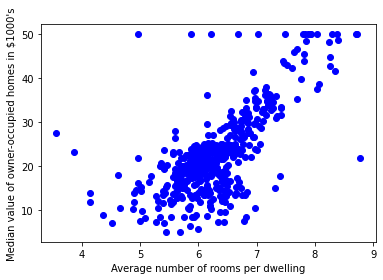

In [9]:
plt.scatter(boston_df.rm,boston_df.medv,color='BLUE')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

## Using Multiple Linear Regression

Manual selection of features.

In [31]:
mask=np.random.rand(len(boston_df))<0.85
test_data=boston_df[~mask]
train_data=boston_df[mask]

In [32]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()

X=np.asanyarray(train_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])
y=np.asanyarray(train_data[['medv']])

regr.fit(X,y)

print(f'Coefficients : {regr.coef_}')

Coefficients : [[-1.20794904e-01  7.93280623e-02  3.37518922e-04 -1.19498761e+01
   4.12114415e+00  8.76020601e-03 -1.70032378e+00  2.41227300e-01
  -1.69680959e-02 -6.10435433e-01]]


In [33]:
prediction=regr.predict(test_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])

X=np.asanyarray(test_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])
y=np.asanyarray(test_data[['medv']])

print(f'Variance Score: {regr.score(X,y)}')

Variance Score: 0.7660248734912543


Using train_test_split function

In [55]:
from sklearn.model_selection import train_test_split

X=np.asanyarray(boston_df[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])
y=np.asanyarray(boston_df[['medv']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

print(f'Train Dataset Size X : {X_train.shape}   y : {y_train.shape}')
print(f'Test Dataset Size X : {X_test.shape}   y : {y_test.shape}')

Train Dataset Size X : (404, 10)   y : (404, 1)
Test Dataset Size X : (102, 10)   y : (102, 1)


In [56]:
regr.fit(X,y)

predcition2=regr.predict(X_test)

print(f'Variance score: {regr.score(X_test,y_test)}')

Variance score: 0.7915915584994067


## Using Linear Regression and Correlation Matrix

Features are selected using correlation matrix

In [57]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


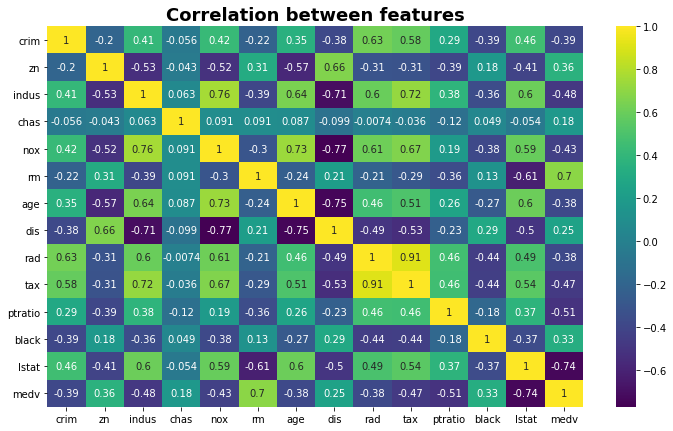

In [60]:
import seaborn as sns

train_corr=boston_df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(train_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

In [61]:
X=boston_df.drop('medv',axis=1)
y=boston_df['medv']

In [71]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

y=np.round(boston_df['medv'])

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values('Score',ascending=False)

,Specs,Score
9,tax,14817.836927
1,zn,5937.859414
0,crim,5503.817133
11,black,3340.486412
6,age,2424.308937
8,rad,1445.257647
12,lstat,1430.549632
2,indus,873.746270
7,dis,163.919426
3,chas,59.080170


In [72]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(f'Feature Importance : {model.feature_importances_}')

Feature Importance : [0.11814642 0.02411885 0.04114549 0.01440464 0.0686719  0.1372082
 0.12072832 0.10967396 0.03273013 0.04380813 0.04358651 0.11094591
 0.13483154]


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f'Train Dataset Size X : {X_train.shape}   y : {y_train.shape}')
print(f'Test Dataset Size X : {X_test.shape}   y : {y_test.shape}')

Train Dataset Size X : (404, 13)   y : (404,)
Test Dataset Size X : (102, 13)   y : (102,)


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regr=LinearRegression()
regr.fit(X_train,y_train)
print(f'R2 Score : {r2_score(y,regr.predict(X))}')

R2 Score : 0.7363932183870274


## Using Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict = rfr.predict(X_train)

print(f'R2 Score : {r2_score(y,rfr.predict(X))}')

R2 Score : 0.96237373839707


## Inference

Random Forest has the highest R2 Score.